### This script test the hand recognition from camera using MediaPipe and OpenCV
## Tutorial: https://www.youtube.com/watch?v=RRBXVu5UE-U&ab_channel=EnjoyMechatronics and https://ai.google.dev/edge/mediapipe/solutions/vision/gesture_recognizer/python

### Though this is a live stream scenarior, I didn't implement the GestureRecognizer in VisionRunningMode.LIVE_STREAM mode.

### Another idea of improve it is to generate more training data and fine-tune the mode. Here is an example to generate training gesture data: https://github.com/techfort/opencv-mediapipe-hand-gesture-recognition 

In [1]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [2]:
cap=cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH,600)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,600)

True

### Use the Hands solution to detect hand and identify landmarks;
### Use the drawing_utils to draw the landmarks (lines and dots);

In [5]:
mp_hands=mp.solutions.hands
mp_draw=mp.solutions.drawing_utils
hand=mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)

In [6]:
pwd

'D:\\mydrive\\python\\HaiMeiKang'

### use the GestureRecognizer to identify different gestures

In [7]:
#base_options = python.BaseOptions(model_asset_path=r'D:\mydrive\python\HaiMeiKang\gesture_recognizer.task') # bug
base_options = python.BaseOptions(model_asset_buffer=open('gesture_recognizer.task', "rb").read())
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)

## Landmarks can be well identified;
## But the gesture classification accuracy is not accuracy, even without grasping any objects.

In [16]:
cv2.destroyAllWindows() #close the image window
pre_gesture='ddddd'
while True:
    success, frame = cap.read()
    if success:
        RGB_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        results=hand.process(RGB_frame)
        if results.multi_hand_landmarks:
            for hand_landmark in results.multi_hand_landmarks:
                #print(hand_landmark)
                mp_draw.draw_landmarks(frame,hand_landmark,mp_hands.HAND_CONNECTIONS)
            #recognition_result = recognizer.recognize(RGB_frame)
            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=RGB_frame)
            #image = mp.Image.create_from_file(RGB_frame)
            recognition_result = recognizer.recognize(mp_image)
            if len(recognition_result.gestures)>0:
                #print('here')
                gesture=recognition_result.gestures[0][0].category_name
                if gesture != 'None' and gesture != pre_gesture:
                    print(gesture)
                pre_gesture=gesture
        cv2.imshow('Video',frame)
        if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
            cap.release()
            break
cv2.destroyAllWindows()
cv2.waitKey(1) 

Open_Palm
Closed_Fist
Closed_Fist
Open_Palm
Open_Palm
Open_Palm
Open_Palm
Thumb_Up
Thumb_Up
Thumb_Up
Thumb_Up
Open_Palm
Open_Palm
Closed_Fist
Thumb_Down
Closed_Fist
Closed_Fist
Closed_Fist
Closed_Fist
Closed_Fist
Closed_Fist
Closed_Fist
Closed_Fist
Closed_Fist
Closed_Fist
Closed_Fist
Open_Palm


KeyboardInterrupt: 

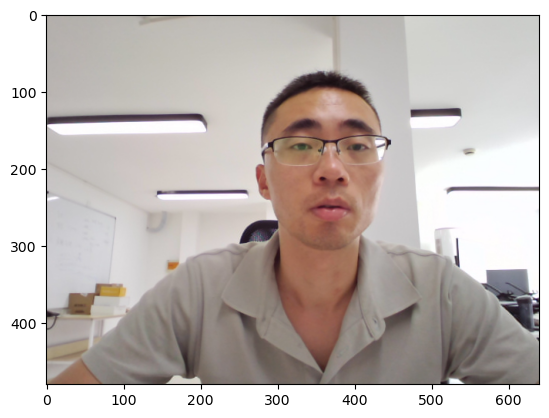

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(RGB_frame)
plt.show()

![](hand_recognition.png)